Power analyses for a relationship between pupil diameter and neural activity in the locus coeruleus (LC), as shown in Fig. 3 of: 

Joshi S, Li Y, Kalwani R, Gold JI (2016) [Relationships between pupil diameter and neuronal activity in the locus coeruleus, colliculi, and cingulate cortex](https://www.sciencedirect.com/science/article/pii/S089662731501034X?via%3Dihub). Neuron 89: 221-34.

**Figure legend**. Trial-by-Trial Associations between Mean Pupil Diameter and LC Spike Rate

(A–C) Example sessions. Per-trial mean pupil diameter (A) and spike rate (B) are each plotted as a function of the time of the beginning of stable fixation in the given trial, with respect to the beginning of the session. Lines are linear fits; (C) shows residuals to these fits. The line is a linear fit to the paired residuals, representing the partial correlation between pupil diameter and spike rate, accounting for linear drifts of each variable as a function of time within the session.

(D) Distributions of Spearman’s partial correlations (ρ) between trial-by-trial pupil diameter and spike rate, accounting for time within the session, for each session from each monkey and each brain region, as indicated. Darker/lighter symbols indicate ρ > 0/ρ < 0. Filled symbols indicate H0: ρ = 0, p < 0.05. Counts (percentages) of significant positive/negative effects are shown for each monkey (per-monkey percentages for positive or negative effects were indistinguishable between LC+ and IC but were different for SCi, including fewer positive effects for both monkeys and more negative effects for monkey Ci; chi-square test, p < 0.05). Black symbols indicate the example sessions above. Scatter along the abscissa is arbitrary, for readability. Horizontal lines are medians; thick lines indicate H0: median = 0, Wilcoxon rank-sum test, p < 0.05.

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done before collecting data.

2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.

3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.

4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.

5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

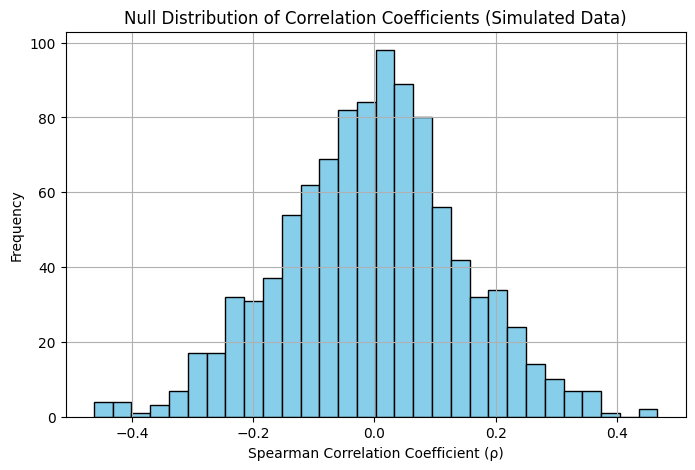

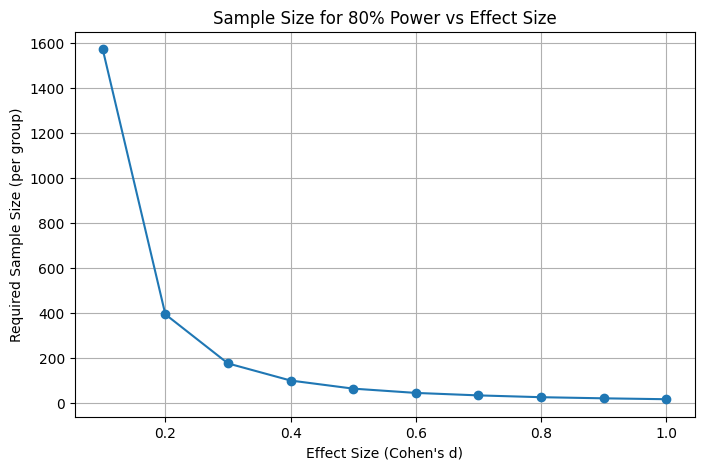

In [5]:
# Simulate null distribution of correlation coefficients (no true effect)
n_sessions = 1000  # Number of simulated sessions
n_trials = 50      # Trials per session
null_corrs = []
for _ in range(n_sessions):
    lc_spikes = np.random.poisson(lam=5, size=n_trials)
    pupil_diam = np.random.normal(loc=5, scale=1, size=n_trials)
    rho, _ = st.spearmanr(lc_spikes, pupil_diam)
    null_corrs.append(rho)
plt.figure(figsize=(8,5))
plt.hist(null_corrs, bins=30, color='skyblue', edgecolor='k')
plt.xlabel('Spearman Correlation Coefficient (ρ)')
plt.ylabel('Frequency')
plt.title('Null Distribution of Correlation Coefficients (Simulated Data)')
plt.grid(True)
plt.show()

# Post-hoc power analysis: required sample size for 80% power across effect sizes
effect_sizes = np.linspace(0.1, 1.0, 10)  # Range of effect sizes (Cohen's d)
power = 0.8  # Desired power
alpha = 0.05  # Significance level
analysis = TTestIndPower()
sample_sizes = []
for d in effect_sizes:
    n = analysis.solve_power(effect_size=d, power=power, alpha=alpha, alternative='two-sided')
    sample_sizes.append(np.ceil(n))
plt.figure(figsize=(8,5))
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Required Sample Size (per group)')
plt.title('Sample Size for 80% Power vs Effect Size')
plt.grid(True)
plt.show()